## Description

This notebook is for computing/plotting the answer to the following setup:
If `m` (hetero/cis) men and women are repeatedly paired up without replacement, and each has only `n` acceptable partners of the other group, how many pairings do we expect to see before an acceptable match is made?

The question was posed by Avi and inspired by this video from The Cut: https://youtu.be/EoJjvEwWuxE


Intuition: This is equivalent to drawing from `m^2` possible choices with `m*n` positive outcomes. If we let `X` be the random variable describing the number of drawings until the first positive outcome, we can compute the expected value of X by summing the product of the value of the random variable and its associated probability, taken over all of the values of the random variable. 
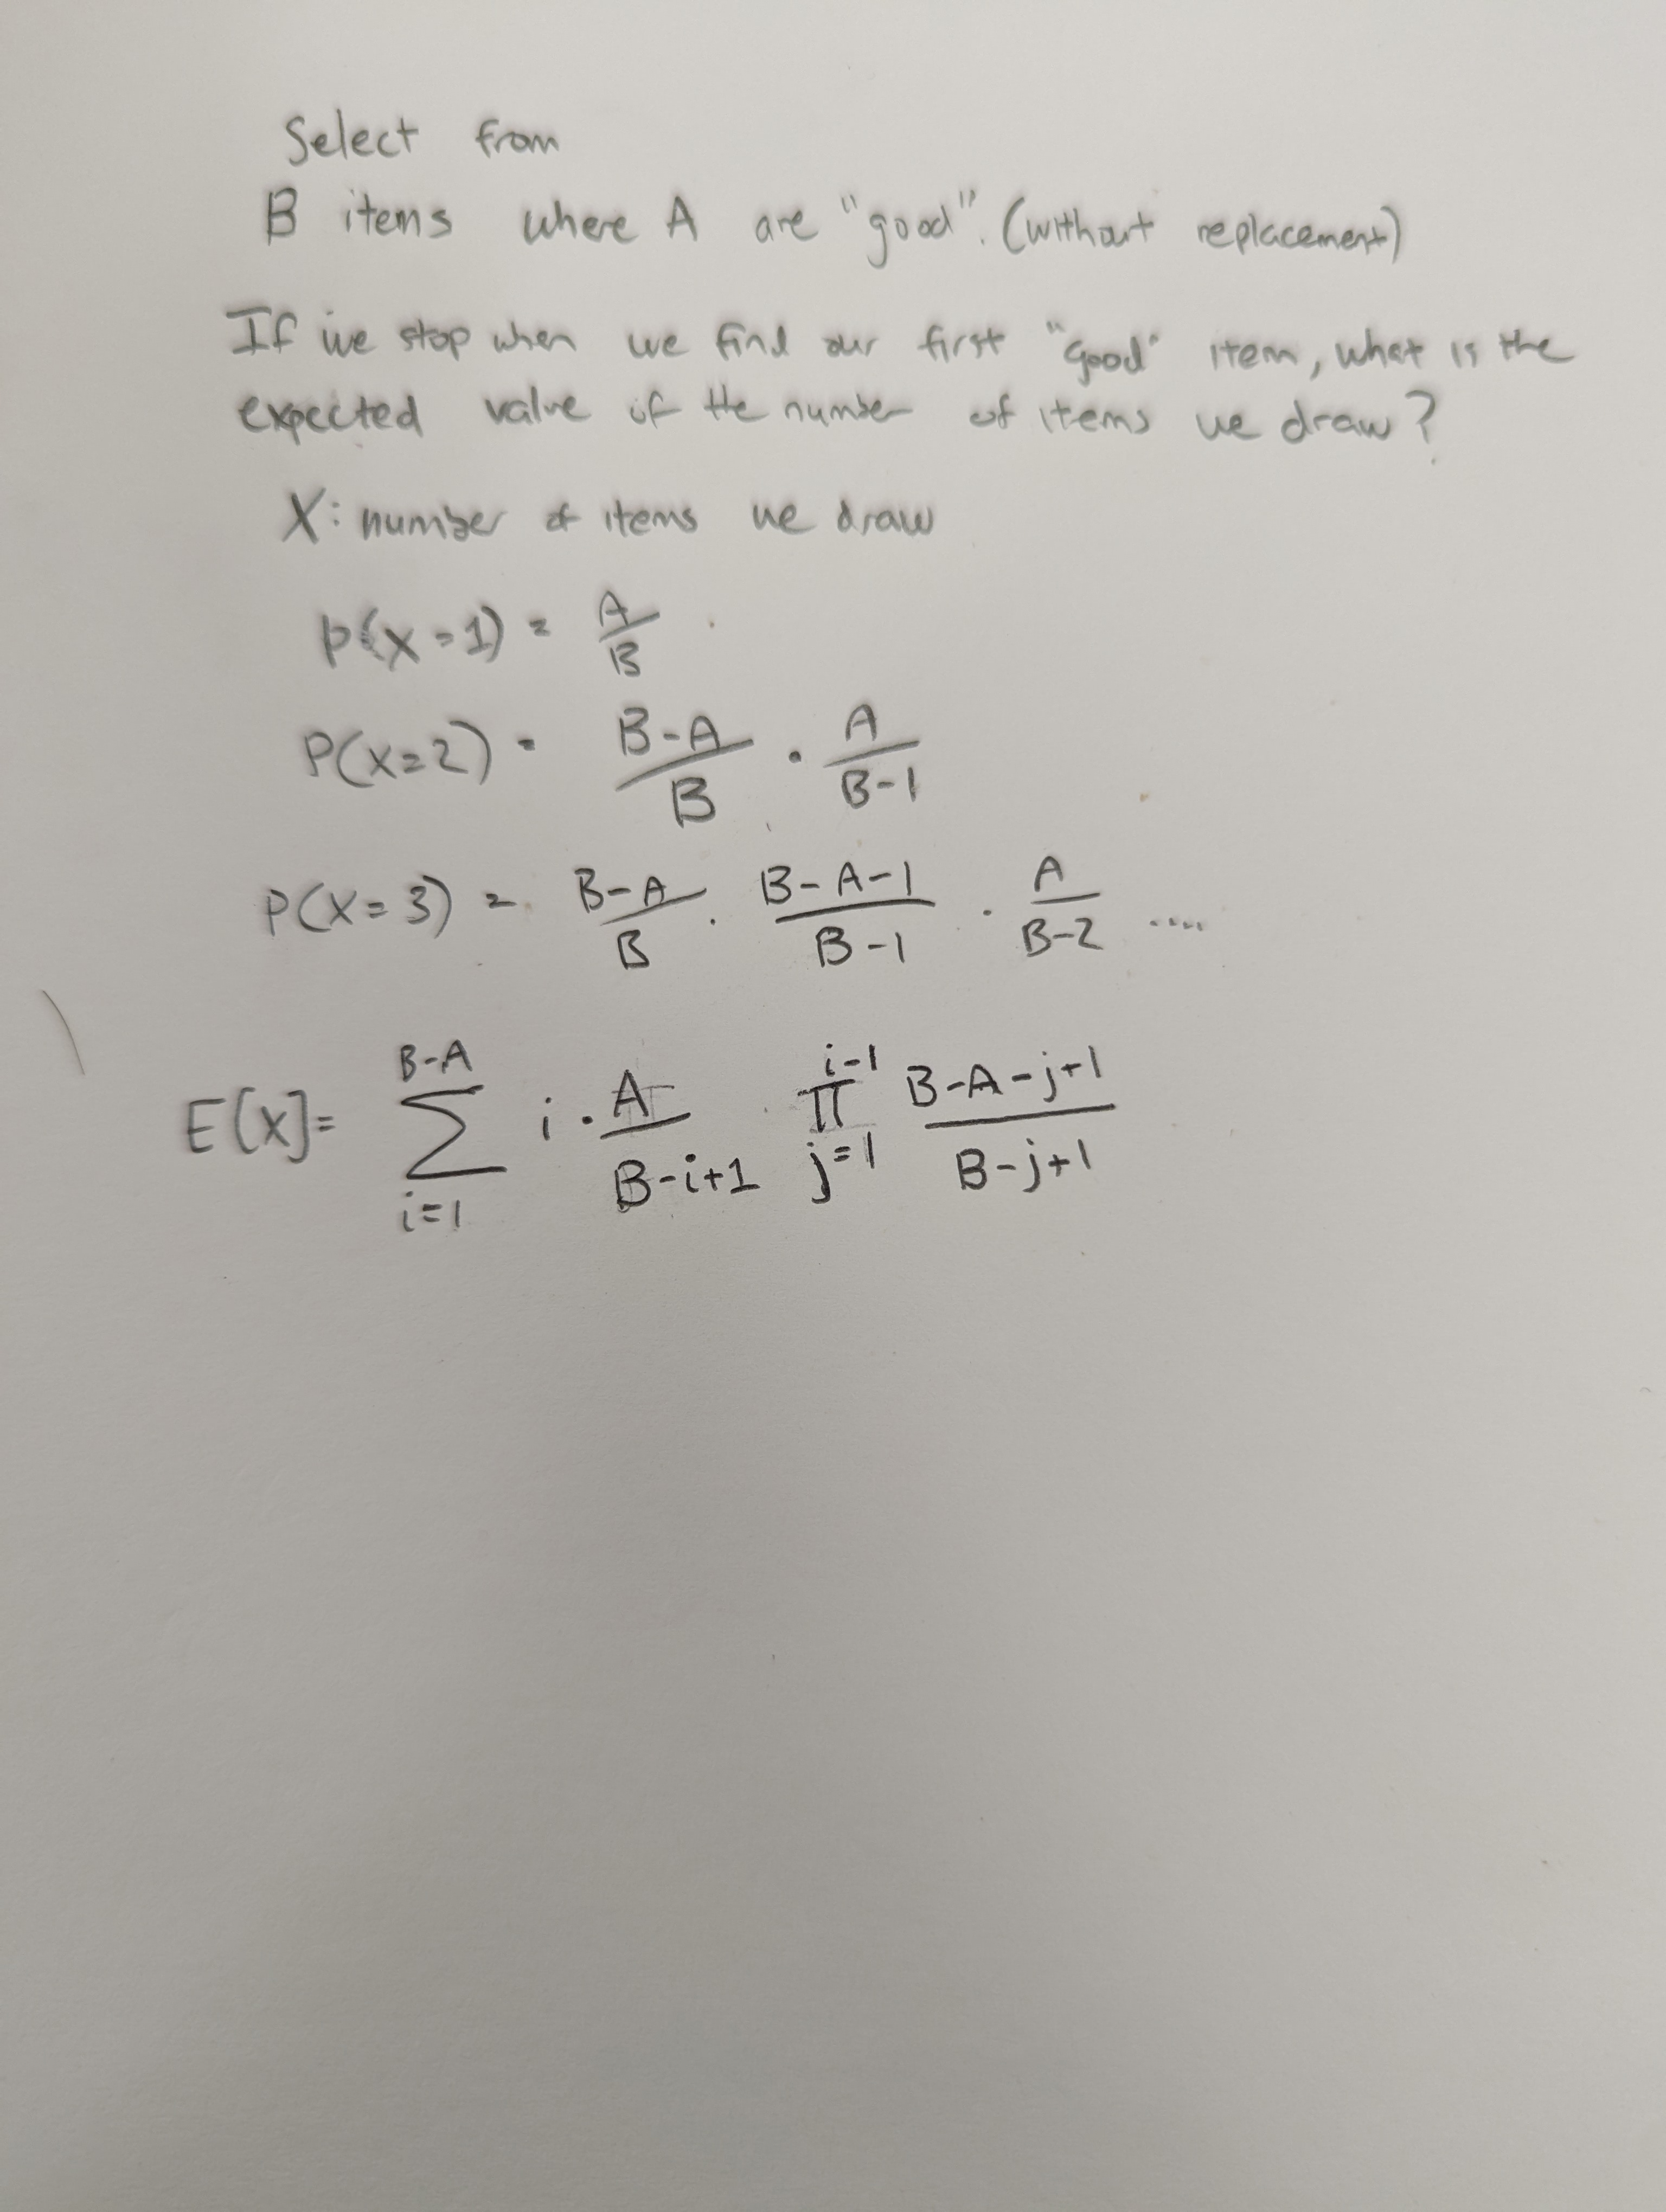

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [11]:
def expected_number_of_dates(m, n):
    assert(m >= 1)
    assert(n >= 1)
    if n >= m:
        return 1

    B = m*m
    A = m*n

    expectation = 0.0

    for i in range(1, B-A):
        prod = float(A) / (B - i + 1)
        for j in range(1, i):
            prod *= float(B - A - j + 1) / (B - j + 1)
        prod *= i
        expectation += prod

    return expectation




In [12]:
m = 10
n = 5
expected_number_of_dates(10,5)

1.9803921568627458

In [13]:
X = np.arange(1, 21, 1)
Y = np.arange(1, 21, 1)

X, Y = np.meshgrid(X, Y)

Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j] = expected_number_of_dates(X[i][j],Y[i][j])

<IPython.core.display.Javascript object>


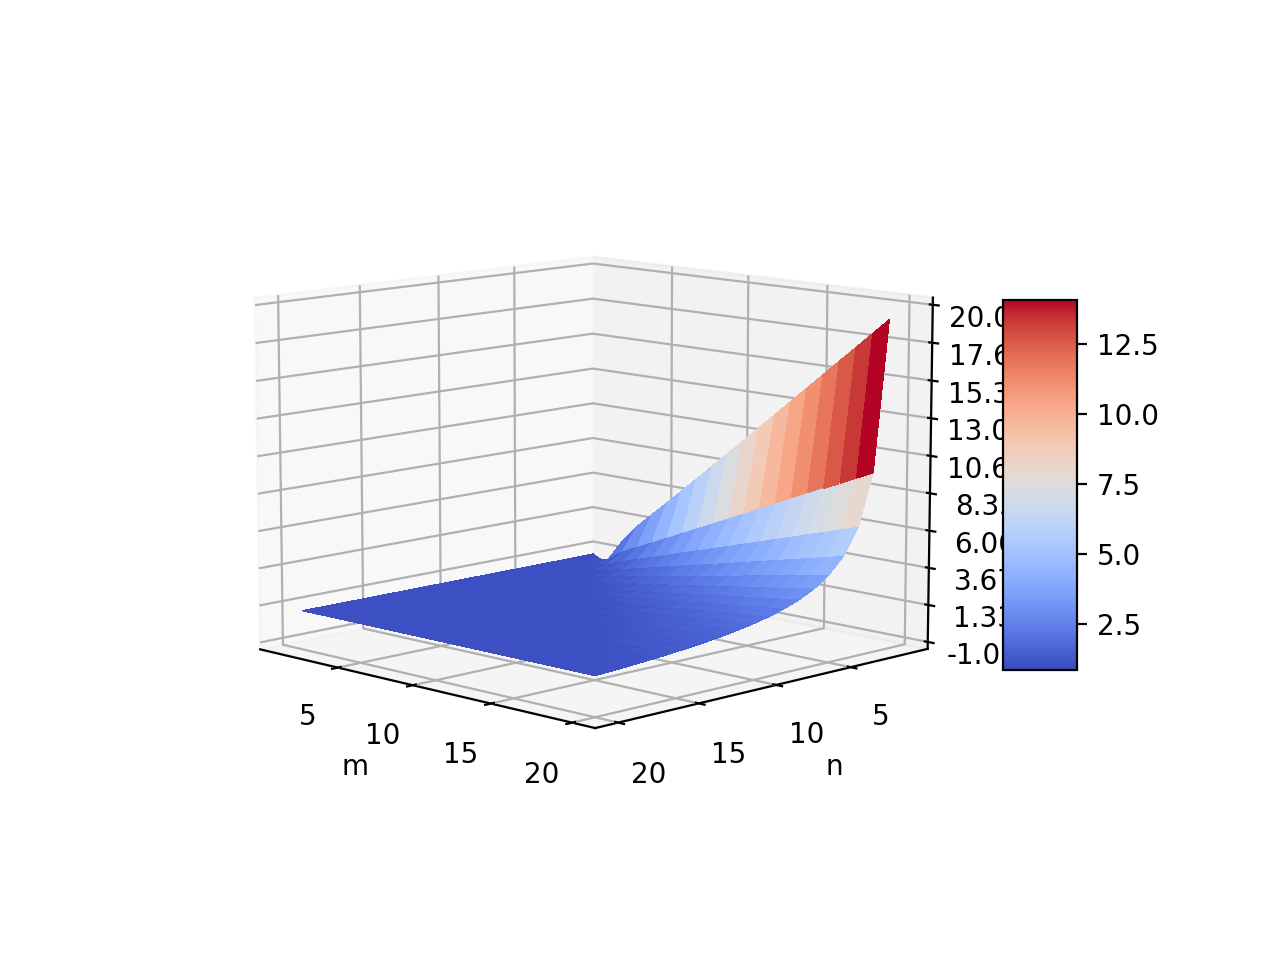

In [14]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("m")
ax.set_ylabel("n")

# Customize the z axis.
ax.set_zlim(-1, 20)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.gca().invert_yaxis()

plt.show()

In [16]:
plt.savefig("expectation.png")